In this module, we'll
# Machine Learning Process
1. Define the problem
2. Collect the data
3. Prepare the data
4. Evaluate the algorithms
5. Improve the results
6. Present the results

- start with the types of ML problems and the types of ML algorithms
- Frame the problem and look at the big picture
  - are we trying to get an estimate for the price
  - or just a category indicating (cheap, medium, expensive), in that case, accuracy is not important, and this could become a classification problem
- selecting a performance measure
  - RSME
  - MAE
  - both of theses are ways to measure the distance between two vectors (the vectors are the predictions and the labels)
- introduce cost function
- introduce the terminology and notations
- Splitting the data into training and test sets
- Computers don't generate truly random numbers, so we need to set the seed
  - https://www.statisticshowto.com/random-seed-definition/#:~:text=Generator%20in%20Excel.-,What%20is%20a%20Random%20Seed%3F,Henkemans%20%26%20Lee%2C%202001).
- Feature Scaling
  - https://towardsdatascience.com/all-about-feature-scaling-bcc0ad75cb35

- scikit-learn has:
  - estimators
  - transformers
  - predictors
  - They can be chained together using pipelines


In [1]:
from sklearn import linear_model
import pandas as pd

X = [[0, 0], [1, 1], [2, 2]]
y = [0, 1, 2]
df = pd.DataFrame(X, columns=['x1', 'x2'])
df['y'] = y
display(df)

reg = linear_model.LinearRegression()
reg.fit(df[["x1", "x2"]], df['y']).coef_

ModuleNotFoundError: No module named 'sklearn'

In [ ]:
from sklearn import datasets

diabetes = datasets.load_diabetes(as_frame=True)
diabetes.frame.head()

# diabetes.DESCR

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [ ]:
from zlib import crc32
import numpy as np

def test_set_check(identifier, test_ratio):
    return crc32(np.int64(identifier)) & 0xffffffff < test_ratio * 2**32

print(crc32(np.int64('1')) & 0xffffffff)
print(crc32(np.int64(4294967296)) & 0xffffffff)
print(0xffffffff)
print(2**32)

2844319735
3718166540
4294967295
4294967296


# Regression
This week we'll talk about one supervised learning technique and algorithm. which is used to predict (continuous) values.
it's a statistical tool for modeling the relationship between a dependent variable (the target) and one or more independent variables (explanatory variable).
that is linear regression.

we'll start with a simple linear regression model, and learn how the same model can be applied for multiple linear regression, and finally we'll talk about polynomial regression.

here's the agenda for what we'll talk about in this module:
## outline
- introduction
- notations
- simple linear regression
  - performance measure AKA cost function (RMSE)
  - gradient descent
- multiple linear regression
- polynomial regression
- linear regression with scikit-learn
- effects of features on the model
- Feature Engineering
  - how to choose the features
  - how to deal with categorical features (ordinal, nominal)




## Module Overview
We've talked about what machine learning is, the different problems it can help us solve, and the different types of machine learning algorithms. In this module, we'll talk about one of the supervised learning techniques, typically used for predicting numerical values. We'll start with a simple linear regression model, then we'll see how that model can be applied for multiple linear regression problems as well, and finally we'll talk about polynomial regression.

Our agenda for this module is as follows:
- Introduction: we'll introduce the problem of regression, what it means, what are the types of regression problems.
- Notations: we'll introduce the terminology and notations we'll use throughout this module. These are notations that you'll find in most machine learning books and courses.
- Linear Regression - how to train a model.
  - Performance Measures and Cost Functions: this is what tells us how good our model is.
  - Gradient Descent: this is the algorithm we'll use to train our model. it uses the information from the cost function to update your model incrementally.
- Implement the model using scikit-learn
- a bit on Feature Engineering
  - how to evaluate your features
  - how to deal with categorical features (ordinal, nominal)
- we'll do a quick recap showing how we can build models using scikit-learn

Let's get started.

## Introduction: What is Regression? Types?
Linear Regression and Polynomial Regression are supervised regression algorithms.

Supervised meaning we use labeled data to train the model.
Regression meaning we predict numerical values instead of categories of classes.

Regression models finds relationships between one or more independent variables, or explanatory variables, and some target variable or dependent variable; as it it depends on the values of your features. The target variable is the value we're trying to predict.

Depending on the shape of the model that would fit the data, we call the model either linear or polynomial. 
If it's simple enough that we can represent it by a straight line, or a plane, a surface we call it a linear model. If it's more complex, where it needs to represented by a curved line or surface we call it a polynomial model.

Keep in mind, it's not always clear from the get-go whether a model is linear or polynomial. It's something we'll have to figure out as we go along.
You experiment with different models, and different algorithms, and you'll see which one works best for your data, or performs best on your data.

For linear regression, we have a simple linear regression model, and a multiple linear regression model. The simple linear regression model is used when we have one independent variable, and the multiple linear regression model is used when we have more than one independent variable.
We can visualize the simple linear regression model as a straight line, and the multiple linear regression model up-to 2 variables as a plane, or a surface. it's a bit more difficult to visualize the multiple linear regression model with more than 2 variables. and at the point we just trust the math and the algorithms that we were able to generalize from the 2D case to the 3D case.

Just so we can start with the end in mind, here's the desired outcome of regression models.

Imagine, you have this dataset that shows 30 observation of years of education, seniority level, and and income


In [72]:
# import csv file
import pandas as pd

income_df = pd.read_csv('data/income2.csv')
income_df.head(6)

,Education,Seniority,Income
0,21.586207,113.103448,99.917173
1,18.275862,119.310345,92.579135
2,12.068966,100.689655,34.678727
3,17.034483,187.586207,78.702806
4,19.931034,20.000000,68.009922
5,18.275862,26.206897,71.504485


If we EDA this data, we can see that there is a positive correlation between years of education and income, and a positive correlation between seniority level and income.

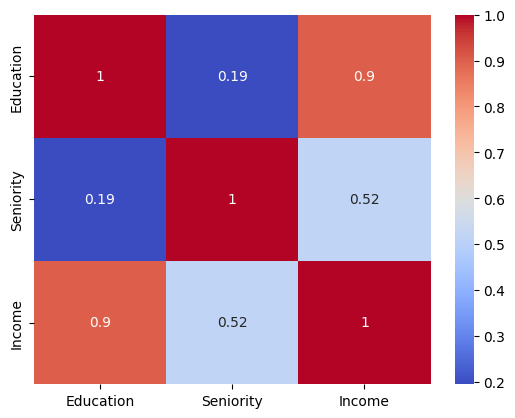

In [ ]:
# Visualize the correlation matrix
import seaborn as sns
import matplotlib.pyplot as plt

income_corr = income_df.corr()
sns.heatmap(income_corr, annot=True, cmap='coolwarm')
plt.show()

It's a quite strong correlation between education and income (0.9), and a slightly weaker correlation between seniority level and income (0.52).

Which means we can create a single linear regression model the predicts income based on years of education. or a multiple linear regression that also includes the seniority level.

let's visualize the data using a scatter plot. We can clearly see that there is a positive correlation between years of education and income. Linear Regression will allow us to find the best fit lin or best fit model that will allow us to predict the income of a person given their years of education.

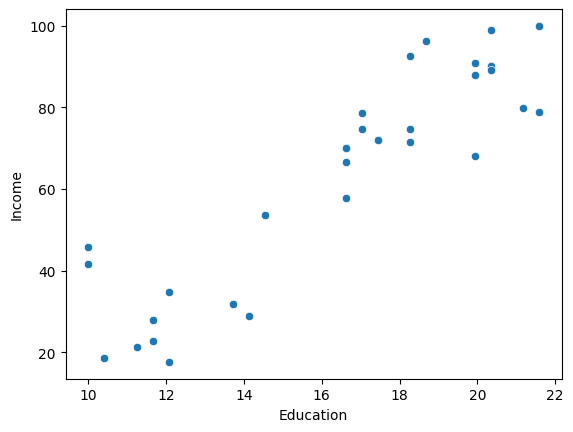

In [ ]:
# Visualize a scatter plot between income and education
sns.scatterplot(x='Education', y='Income', data=income_df)
plt.show()

But let's try to get, seniority level in the mix. Visualize it an 3D scatter plot.

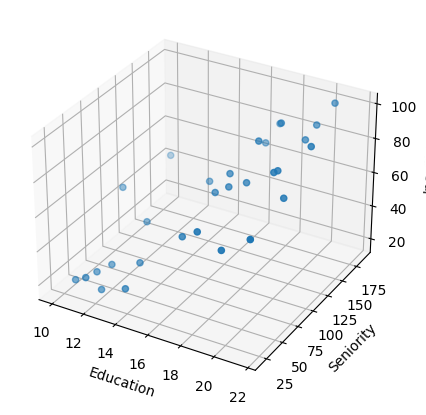

In [ ]:
# visualize a 3d scatter plot between Education, Seniority, and Income using mpl_toolkits
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(income_df['Education'], income_df['Seniority'], income_df['Income'])
ax.set_xlabel('Education')
ax.set_ylabel('Seniority')
ax.set_zlabel('Income')
plt.show()

ok we kind of see the relationship, but I think an interactive plot will be better. so let's recreate this using plotly.

In [76]:
# visualize a 3d scatter plot between Education, Seniority, and Income using plotly
import plotly.express as px


fig = px.scatter_3d(income_df, x='Education', y='Seniority', z='Income')
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
fig.show()


![3d scatter plot](assets/3d-income.gif)

- Look at the different relationships between the 3 variables.
- visualize them on 2d scatter plots
- show that a surface can cut through that.

we can see that we can get a surface model that can cut through the data points, and this is the best fit model. Once we start using more than one variable as independent variables, or explanatory variables, that's multiple linear regression.

Finding that line, finding that surface, finding that curve, that's the goal of regression models. once you have more than 2 independent variables, it's not easy to visualize the model, but the math will still hold.


Now that we know what we want to achieve, let's talk about the model and its notation.

See you in the next video.


## Model and Notations
This is a very short video, but it's very important. 
It introduces the notations that you'll find in a lot of machine learning algorithms, and in other machine learning courses and books.
so it's important to understand them.

Before we talk about the model notation, let's talk about the data notations.

Every dataset we work with has a number (m) of (records, observations, signals, instances, data point), these are all synonyms.
Each of those observations ia a vector of (features, independent variables, explanatory variables, predictors, dimensions, attributes) (x) and a for labelled data, or data we use in supervised learning we also have a target (y). These are also called targets, dependent variables, or a responses, maybe classes, or a categories if it's a class.
the number of features is (n). 

so for this dataset, we can say that:
- we have 30 records, m = 30
- we have 2 features, n = 2
- features are years of education, and seniority level
- target is income

Now let's forget about machine learning for a second, and talk about something we all know from high school math, the equation of a line.

$$y = mx + b$$

where:
- m: slope
- c: y-intercept or the bias term, or the value of y when x = 0

sounds familiar? if we you want to get the y value, you multiply the x value by the slope, and add the y-intercept.

In [77]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(-5, 5, 11)

def plot_line(y, color):
  y_ = eval(y)
  plt.plot(x, y_, label=f'y={y}', marker='o', markersize=5, color=color)
  plt.legend(loc='best')
  plt.xlabel('x')
  plt.ylabel('y')

print(x)

[-5. -4. -3. -2. -1.  0.  1.  2.  3.  4.  5.]


so we are able to represent a line using those 2 parameters.

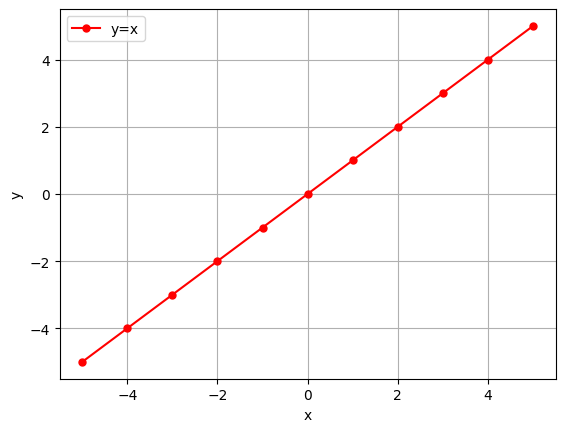

In [82]:
plot_line(y='x', color='red')
# plot_line(y='3*x+5', color='blue')
# plot_line(y='-2*x+4', color='green')
# plot_line(y='2*x', color='purple')

plt.grid()
plt.show()

ok so we mentioned for simple linear regression, the desired model, the desired outcome is to draw a line. so essentially, we're trying to figure out what the value of m and b are, so that we can draw a line that fits our data.

it's the same formula but the notation is different. we say
$$\hat{y} = h(x) = \theta_{0} + \theta_{1}x$$

where:
- $\hat{y}$: the predicted value, also called the hypothesis function $h(x)$
- $\theta_{0}$: the bias term, or the y-intercept
- $\theta_{1}$: the slope of the line

it's as if the $\theta_{0}$ was multiplied by $x^{0} = 1$

ok but let's generalize that so we can use to represent a plane, or a surface.

$$\hat{y} = h(x) = \theta_{0} + \theta_{1}x_{1} + \theta_{2}x_{2}$$

this is as if x2 was the z-axis, and we're trying to draw a plane that satisfies the equation.

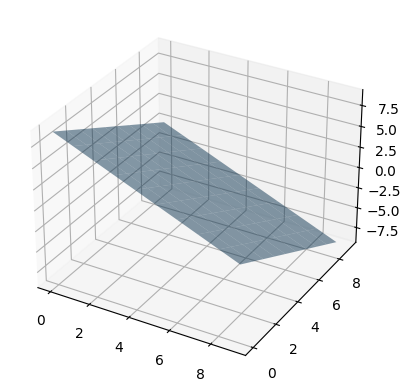

In [88]:
fig = plt.figure()

ax = fig.add_subplot(111,projection='3d')

x1, x2 = np.meshgrid(range(10), range(10))

y_hat = (9 - x1 - x2)

ax.plot_surface(x1, x2, y_hat, alpha=0.5)

plt.show()

so that would be your multiple linear regression model. so the most generalized form of this equation is:

$$\hat{y} = h(x) = \theta_{0} + \theta_{1}x_{1} + \theta_{2}x_{2} + ... + \theta_{n}x_{n}$$

or the vectorized form of this would be:

$$\hat{y} = h(x) = \Theta^{T}X$$

if you're not familiar with the vectorized form, don't worry about it. it's just a way to represent the same equation in a more compact way. Unless you're creating your own implementation of the algorithm, you don't need to worry about how all the math is done, but it's just important to understand how the model works, so you understand the results you're getting.

so to summarize the notations:
- $X$: the matrix of features, or the matrix of independent variables
- $\Theta$: the vector of parameters, or the vector of coefficients, the values we're adjusting to fit the model.
- $\hat{y}$: the predicted value, also called the hypothesis function $h(x)$

now that we know the model, let's talk about how we can train the model. how we can find the best values for $\Theta$.

## Linear Regression - Performance Measure/Cost Function
In simple linear regression, we aim to get a a line that can represent the data we have as best as possible. So we need to define what "best" means.
why do we say that this line here is better than this line here?

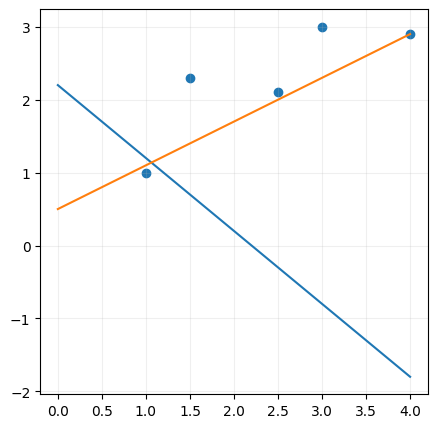

In [95]:
# a pandas dataframe with 2 columns: x and y
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

x = [1, 1.5, 2.5, 3, 4]
y = [1, 2.3, 2.1, 3, 2.9]

df = pd.DataFrame({'x': x, 'y': y})
# plot the data

# Scatter plot of the dots
f, ax = plt.subplots(figsize=(5,5))
ax.scatter(df['x'], df['y'])

# Plot an arbitrary line
x = np.linspace(0, 4, 11)
y_bad = 2.2+ -x
y_good = 0.6*x + 0.5
ax.plot(x,y_bad, label=f'y=2.25 - bad')
ax.plot(x,y_good, label=f'y=2.25 - good')

ax.grid(alpha=0.2)
plt.show()

We also know that value of m or the slope is the change in y divided by the change in x. and the value of b is the y-intercept.
$$y = \frac{y_{2} - y_{1}}{x_{2} - x_{1}}x + b$$

## Simple Linear Regression - Drawing lines and performance measure
In this video, we'll talk about simple linear regression, which is a special case of multiple linear regression, where we're using a single feature to predict a single value.
As we've mentioned before, the goal here is find the best fitting line that describes the relationship between the features and the target.

Here obviously, this line better describes the relationship than this line.
![linear regression: good and bad](./assets/linear-good-bad.png)

but how do we find that line? from Algebra, we know that the formula for a line is:

$$y = mx + c$$

where:
- m: slope
- c: y-intercept



In [ ]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(-5, 5, 11)
def plot_line(y, color):
  y_ = eval(y)
  plt.plot(x, y_, label=f'y={y}', marker='o', markersize=5, color=color)
  plt.legend(loc='best')
  plt.xlabel('x')
  plt.ylabel('y')

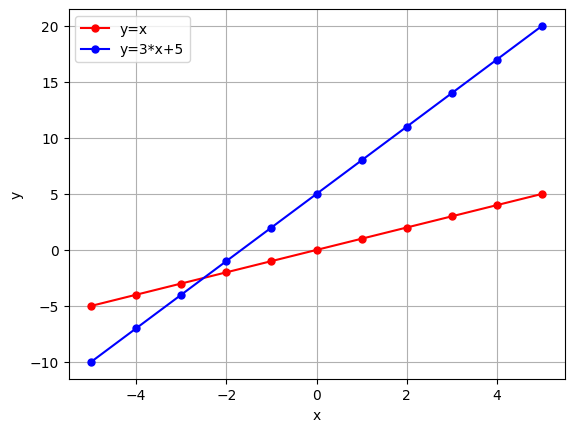

In [ ]:
plot_line(y='x', color='red')
plot_line(y='3*x+5', color='blue')
# plot_line(y='0.5*x+4', color='green')
# plot_line(y='2*x', color='purple')

plt.grid()
plt.show()



and we can adjust the slope and the y-intercept to draw any line you want.

and you may remember how you can find a line that passes through 2 points, using the following formula:

$$y = \frac{y_{2} - y_{1}}{x_{2} - x_{1}}x + b$$

where:
- b: y-intercept
- the fraction is the slope

but for this dataset, we can't just arbitrarily choose 2 points to draw a line. It may be close enough, but it wouldn't be the best fit line. 
Actually, how would you know that what you have is a good fit? For that we need to define a performance measure, or a cost function, that will allow us to evaluate the model's performance.

Now there are many different performance measures, the most common of which is that we get the mean of the squared errors or residuals. 
What does that mean? well, we take the difference between the actual value and the predicted value, and we square it (so that we lose the negative sign). and we do that for all the data points, and we get the mean of those squared errors.

$$\frac{1}{m}\sum_{i=1}^{m}(y_{i} - \hat{y_{i}})^{2}$$


Obviously, the smaller the mean of the squared errors, the better the model is. So we want to find the line that minimizes the mean of the squared errors.

Let's see an example here.



In [ ]:
# a pandas dataframe with 2 columns: x and y
import pandas as pd
import numpy as np

x = [1, 1.5,2.5,3,4]
y = [1, 2.3,2.1,3,2.9]

df = pd.DataFrame({'x': x, 'y': y})

The easiest way to do this, is to draw a line, any line, and then calculate the distance between the line and the data points. Then, we square the distance, and we sum all the squared distances, and then we take the square root of the sum. We call this the loss function, or the cost function. and we want to minimize this function.

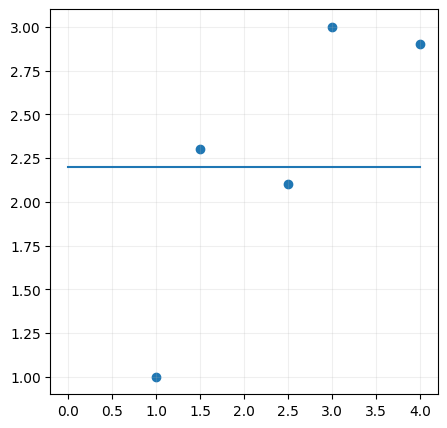

In [ ]:
# plot the data
import matplotlib.pyplot as plt

# Scatter plot of the dots
f, ax = plt.subplots(figsize=(5,5))
ax.scatter(df['x'], df['y'])

# Plot an arbitrary line
x = np.linspace(0, 4, 11)
y = 0*x + 2.2
ax.plot(x,y, label=f'y=2.25')

ax.grid(alpha=0.2)
plt.show()

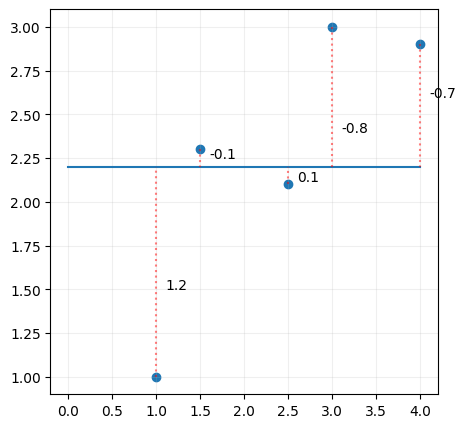

In [ ]:
# plot the data
import matplotlib.pyplot as plt

# Scatter plot of the dots
f, ax = plt.subplots(figsize=(5,5))
ax.scatter(df['x'], df['y'])

# Plot an arbitrary line
x = np.linspace(0, 4, 11)
y = 0*x + 2.2
ax.plot(x,y, label=f'y=2.25')

# Residuals
ax.plot([1,1],[1, 2.2], color='red', linestyle='dotted', alpha=0.5)
ax.text(1.1, 1.5, '1.2')
ax.plot([1.5,1.5],[2.3, 2.2], color='red', linestyle='dotted', alpha=0.5)
ax.text(1.6, 2.25, '-0.1')
ax.plot([2.5,2.5],[2.1, 2.2], color='red', linestyle='dotted', alpha=0.5)
ax.text(2.6, 2.12, '0.1')
ax.plot([3,3],[3, 2.2], color='red', linestyle='dotted', alpha=0.5)
ax.text(3.1, 2.4, '-0.8')
ax.plot([4,4],[2.9, 2.2], color='red', linestyle='dotted', alpha=0.5)
ax.text(4.1, 2.6, '-0.7')

ax.grid(alpha=0.2)
plt.show()

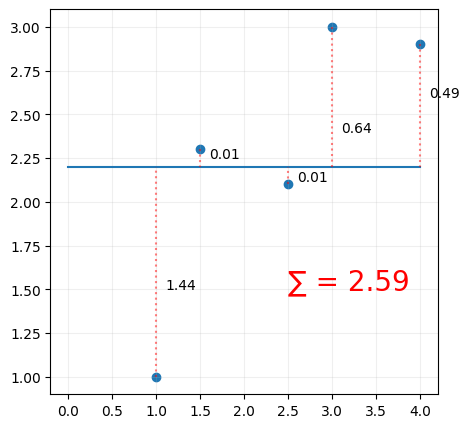

In [ ]:
# plot the data
import matplotlib.pyplot as plt

f, ax = plt.subplots(figsize=(5,5))
ax.scatter(df['x'], df['y'])

x = np.linspace(0, 4, 11)
y = 0*x + 2.2
ax.plot(x,y, label=f'y=2.25')

ax.plot([1,1],[1, 2.2], color='red', linestyle='dotted', alpha=0.5)
ax.text(1.1, 1.5, '1.44')
ax.plot([1.5,1.5],[2.3, 2.2], color='red', linestyle='dotted', alpha=0.5)
ax.text(1.6, 2.25, '0.01')
ax.plot([2.5,2.5],[2.1, 2.2], color='red', linestyle='dotted', alpha=0.5)
ax.text(2.6, 2.12, '0.01')
ax.plot([3,3],[3, 2.2], color='red', linestyle='dotted', alpha=0.5)
ax.text(3.1, 2.4, '0.64')
ax.plot([4,4],[2.9, 2.2], color='red', linestyle='dotted', alpha=0.5)
ax.text(4.1, 2.6, '0.49')

ax.text(2.5, 1.5, '∑ = 2.59', fontsize=20, color='red')

ax.grid(alpha=0.2)
plt.show()

so again:
- measure error
- Square it
- sum it


Then we change the parameters, change the line, and you calculate the loss function again, and you keep doing this until you find the line that minimizes the loss function.

![loss function](./assets/loss.png)


so far so good, but how do we get this minimum in the loss?

we use a formula called gradient descent. this function is used in many machine learning algorithms, not just linear regression. in a following optional video, I will talk about that.

This process here for simple linear regression is exactly the same as the process for multiple linear regression, except that we have more than one feature, and we have more than one parameter.

## Gradient Descent
In this video, we'll talk about gradient descent, which is a very important algorithm in machine learning. It's used in many machine learning algorithms, not just linear regression.
it's an optimization algorithm that helps us find the minimum of a function. In our case, we want to find the minimum of the loss function.

supposed you're on a mountain, it's dark, it's foggy, and you can only feel the slope of the ground below your feet. A good strategy to get down, is that you feel the ground and move it in the direction of the steepest slope. That is exactly what the gradient descent does.

For any of your feature coefficients, you start somewhere and then you calculate the gradient of the slope, and then you move in the direction of the gradient, and then you calculate the gradient again, and then you move in the direction of the gradient, and it keeps doing this until it reaches the minimum.

$$\Theta^{ next step} = \Theta - \eta . MSE(\Theta) $$
where:
- theta: the feature coefficients
- eta: the learning rate

I'm presenting this formula in a vectorized form, but you can also write it in a loop form.
I think going over the math behind this formula is a bit out of scope for this course, but I'll leave a link to a video that explains it in detail.

anyway every coefficient is updated simultaneously, so you don't update one coefficient, and then update the other coefficient, and then update the other coefficient, and so on. you update all the coefficients simultaneously.

everytime you update the coefficients, you calculate the cost function, and calculate the gradient, and you move in the direction of the gradient, and you keep doing this until you reach the minimum, a point where the gradient is zero (or very close to zero). a value where the update theta values doen't change.

In a way, this very simple problem seems that it'll take a lot of coding to solve it, but thankfully, a library called scikit-learn has a class called LinearRegression that does all the heavy lifting for us. We'll talk about it in the next video.

## Linear Regression in Scikit-Learn
Talk is cheap, let's see some code.
Thankfully, we won't need to do all of those calculations by hand, because scikit-learn has a class called LinearRegression that does all the heavy lifting for us.

```python
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(df['x'], df['y'])
```

# Polynomial Regression
polynomial regression is a special case of multiple linear regression, where we're using polynomial features instead of linear features. as in the data is usually can't be described by a straight line or a plane, but by a curve, or a curved surface.

Let me show that on a different dataset here

In [ ]:
income2_df = pd.read_csv('data/position_salaries.csv')
income2_df
sns.scatterplot(x='Level', y='Salary', data=income2_df)
plt.show()

Obviously, this data can't be described by a straight line, but by a curve. So we can use polynomial features instead of linear features to describe this data.

## Notes
- feature scaling is important for gradient descent
- explain how the algorithm works
- data splitting
- https://medium.com/@thaddeussegura/simple-linear-regression-in-200-words-eb0835324af5
https://medium.com/@thaddeussegura/multiple-linear-regression-in-200-words-data-8bdbcef34436
https://medium.com/@thaddeussegura/polynomial-regression-in-200-words-2b1f4f8b5c5a

Finally we'll end the module with a complete end-to-end example of a machine learning project with all of its cleaning, preprocessing steps.